# Breast Cancer Diagnosis Dataset EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import time

## Read the data

In [2]:
# 1. Load the dataset
# Replace 'stroke_data.csv' with your actual file path
df = pd.read_csv('data.csv') 

# 2. Basic Inspection
print("--- Data Shape ---")
print(df.shape)

print("\n--- Feature Data Types ---")
print(df.dtypes)

--- Data Shape ---
(569, 33)

--- Feature Data Types ---
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float6

In [3]:
print("\n--- First Few Rows ---")
display(df.head())


--- First Few Rows ---


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
# feature names as a list
col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B

# There is an id that cannot be used for classificaiton
# Unnamed: 32 feature includes NaN so we do not need it. 
list = ['Unnamed: 32','id']
df = df.drop(list, axis=1)

x = df.drop(['diagnosis'], axis=1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

## Outliers

Numerical Variables Found: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

--- Numerical Statistics (Check 'min' and 'max' columns carefully) ---
                                min         50%         max        mean
radius_mean                6.981000   13.370000    28.11000   14.127292
texture_mean               9.710000   18.840000    39.28000   19.289649
perimeter_mean            43.790000   86.240000   188.

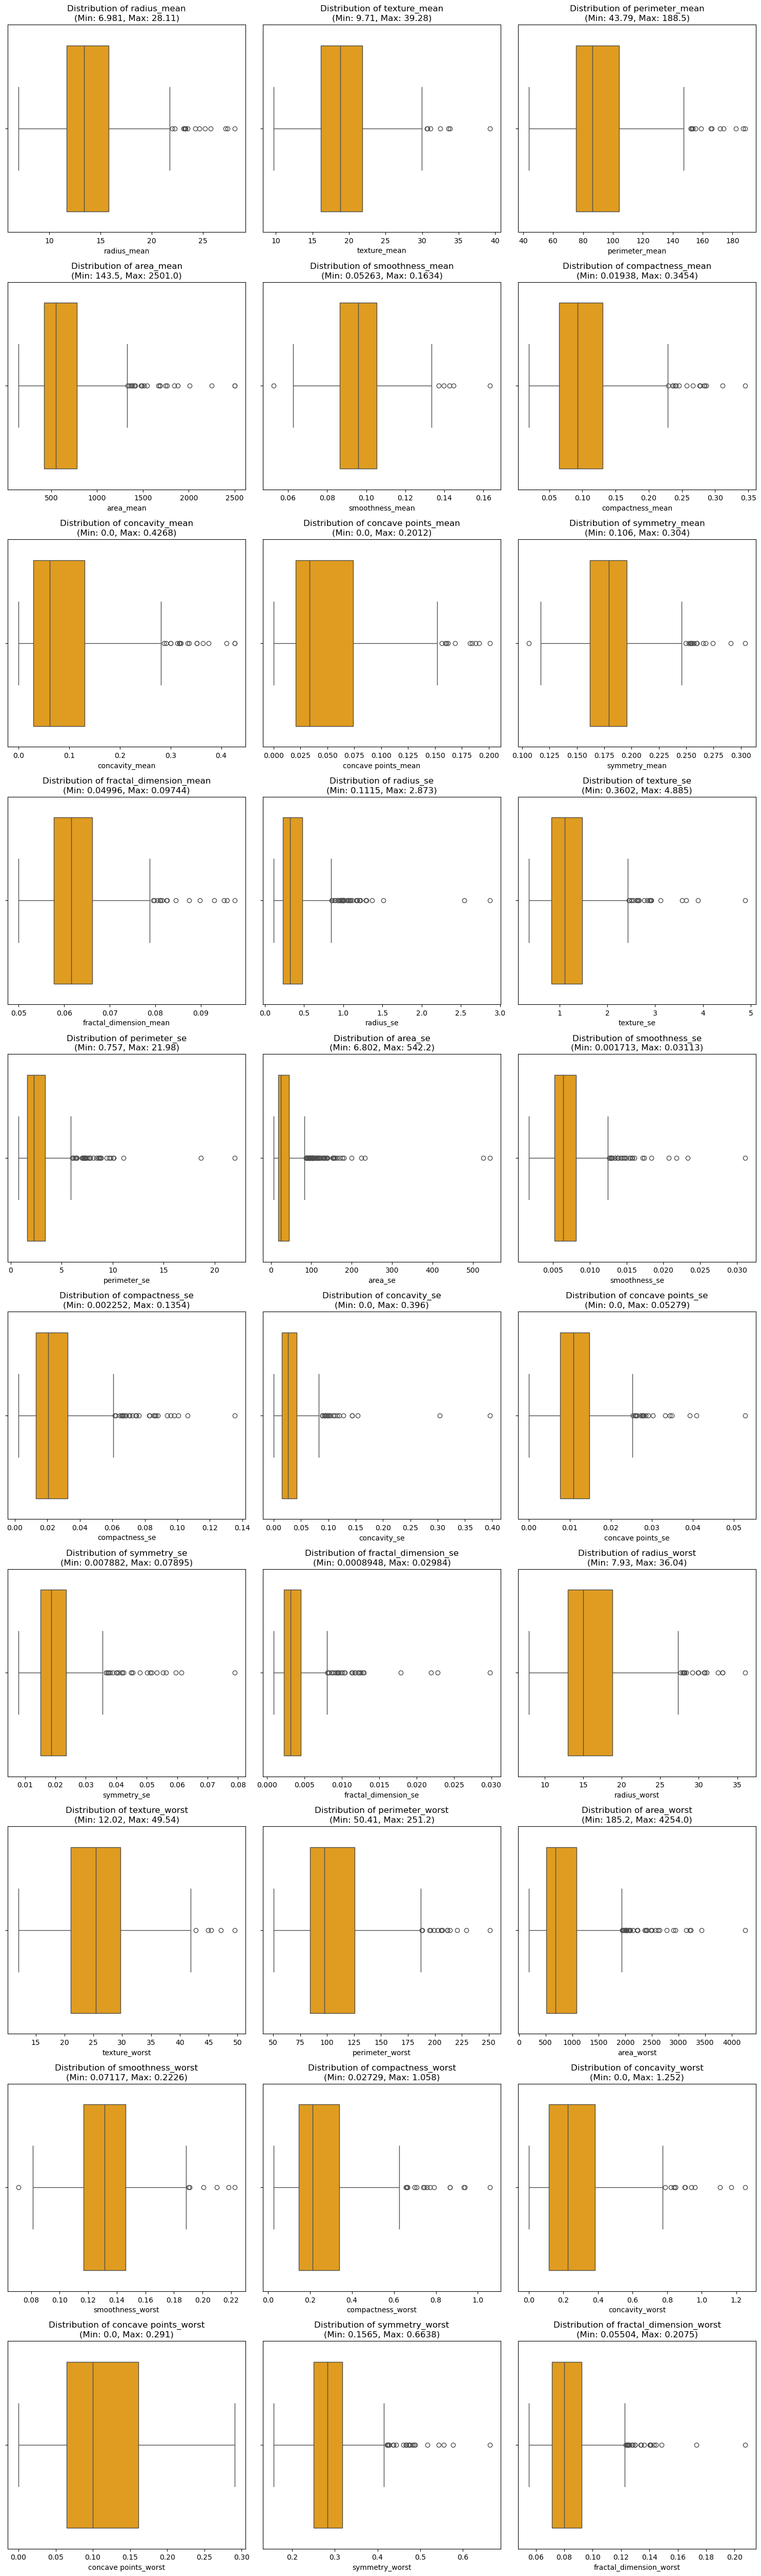

In [6]:
# --- PART 1: NUMERICAL VARIABLE AUDIT ---
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical Variables Found: {numerical_cols}")

# A. Statistical Summary (The "Impossible Value" Check)
# We transpose (.T) the describe() output to make it easier to read 'min' and 'max'
stats = df[numerical_cols].describe().T
print("\n--- Numerical Statistics (Check 'min' and 'max' columns carefully) ---")
print(stats[['min', '50%', 'max', 'mean']])

# C. Visualization (Boxplots for everything)
# Dynamically calculate grid size
n_num = len(numerical_cols)
rows = (n_num // 3) + 1
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Distribution of {col}\n(Min: {df[col].min()}, Max: {df[col].max()})')

plt.tight_layout()
plt.show()

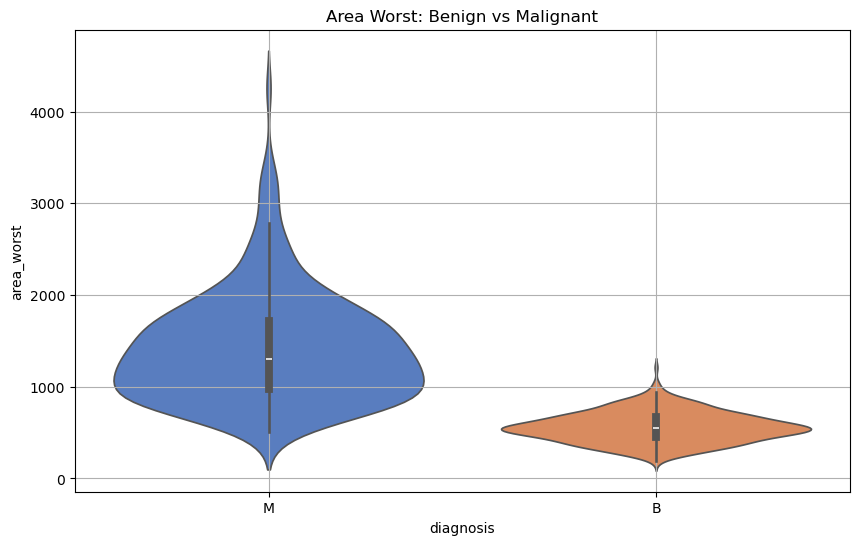

Number of rows with Extreme Area (> 2000): 30
Diagnosis of these extreme cases:
diagnosis
M    30
Name: count, dtype: int64


In [7]:
# Create a Violin Plot to see the "Outliers" in context
# We use 'area_worst' because it had the biggest spread (Max 4254)
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='area_worst', data=df, palette='muted', hue='diagnosis')
plt.title('Area Worst: Benign vs Malignant')
plt.grid(True)
plt.show()

# Statistical Proof:
# Let's look at the "Outliers" (e.g., Area Worst > 2000)
extreme_area = df[df['area_worst'] > 2000]
print(f"Number of rows with Extreme Area (> 2000): {len(extreme_area)}")
print(f"Diagnosis of these extreme cases:\n{extreme_area['diagnosis'].value_counts()}")

These aren't outliers, but actually advanced malignant tumors.

## Check for missing data

In [8]:
print(f"--- Missing Value Report (Total Rows: {len(x)}) ---\n")

# 1. Check Standard Missing Values (NaN)
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Create a clear dataframe to view results
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage (%)': missing_pct
})

# Filter to show only columns that have missing data (to reduce noise)
# (sorting by count descending)
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

# 2. Check for "Hidden" Missing Values (e.g., "Unknown")
print("\n--- 'Hidden' Missing Values (Categorical 'Unknown') ---")
categorical_cols = df.select_dtypes(include='object').columns

found_hidden = False
for col in categorical_cols:
    # Check if the column contains the string "Unknown"
    if 'Unknown' in df[col].values:
        count = len(df[df[col] == 'Unknown'])
        pct = (count / len(df)) * 100
        print(f"{col:<20} | Count: {count:<5} | {pct:.1f}%")
        found_hidden = True

if not found_hidden:
    print("No 'Unknown' values found in categorical columns.")

--- Missing Value Report (Total Rows: 569) ---

Empty DataFrame
Columns: [Missing Count, Percentage (%)]
Index: []

--- 'Hidden' Missing Values (Categorical 'Unknown') ---
No 'Unknown' values found in categorical columns.


## Visualization

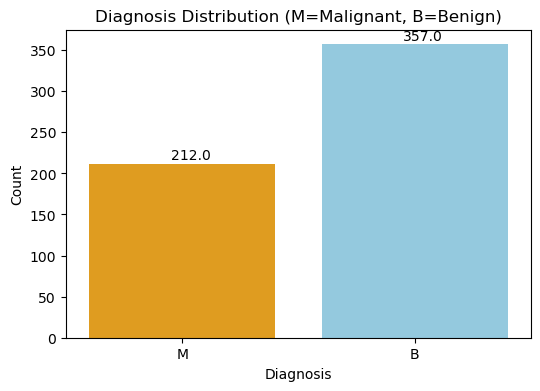

Number of Benign:  357
Number of Malignant :  212


In [9]:
# 1. Plotting
plt.figure(figsize=(6, 4))
# x=y makes it vertical. palette sets the specific colors.
ax = sns.countplot(x=y, palette={'B': 'skyblue', 'M': 'orange'}, hue=y)

plt.title('Diagnosis Distribution (M=Malignant, B=Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Optional: Add the actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 5))

plt.show()

# 2. Printing Counts
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

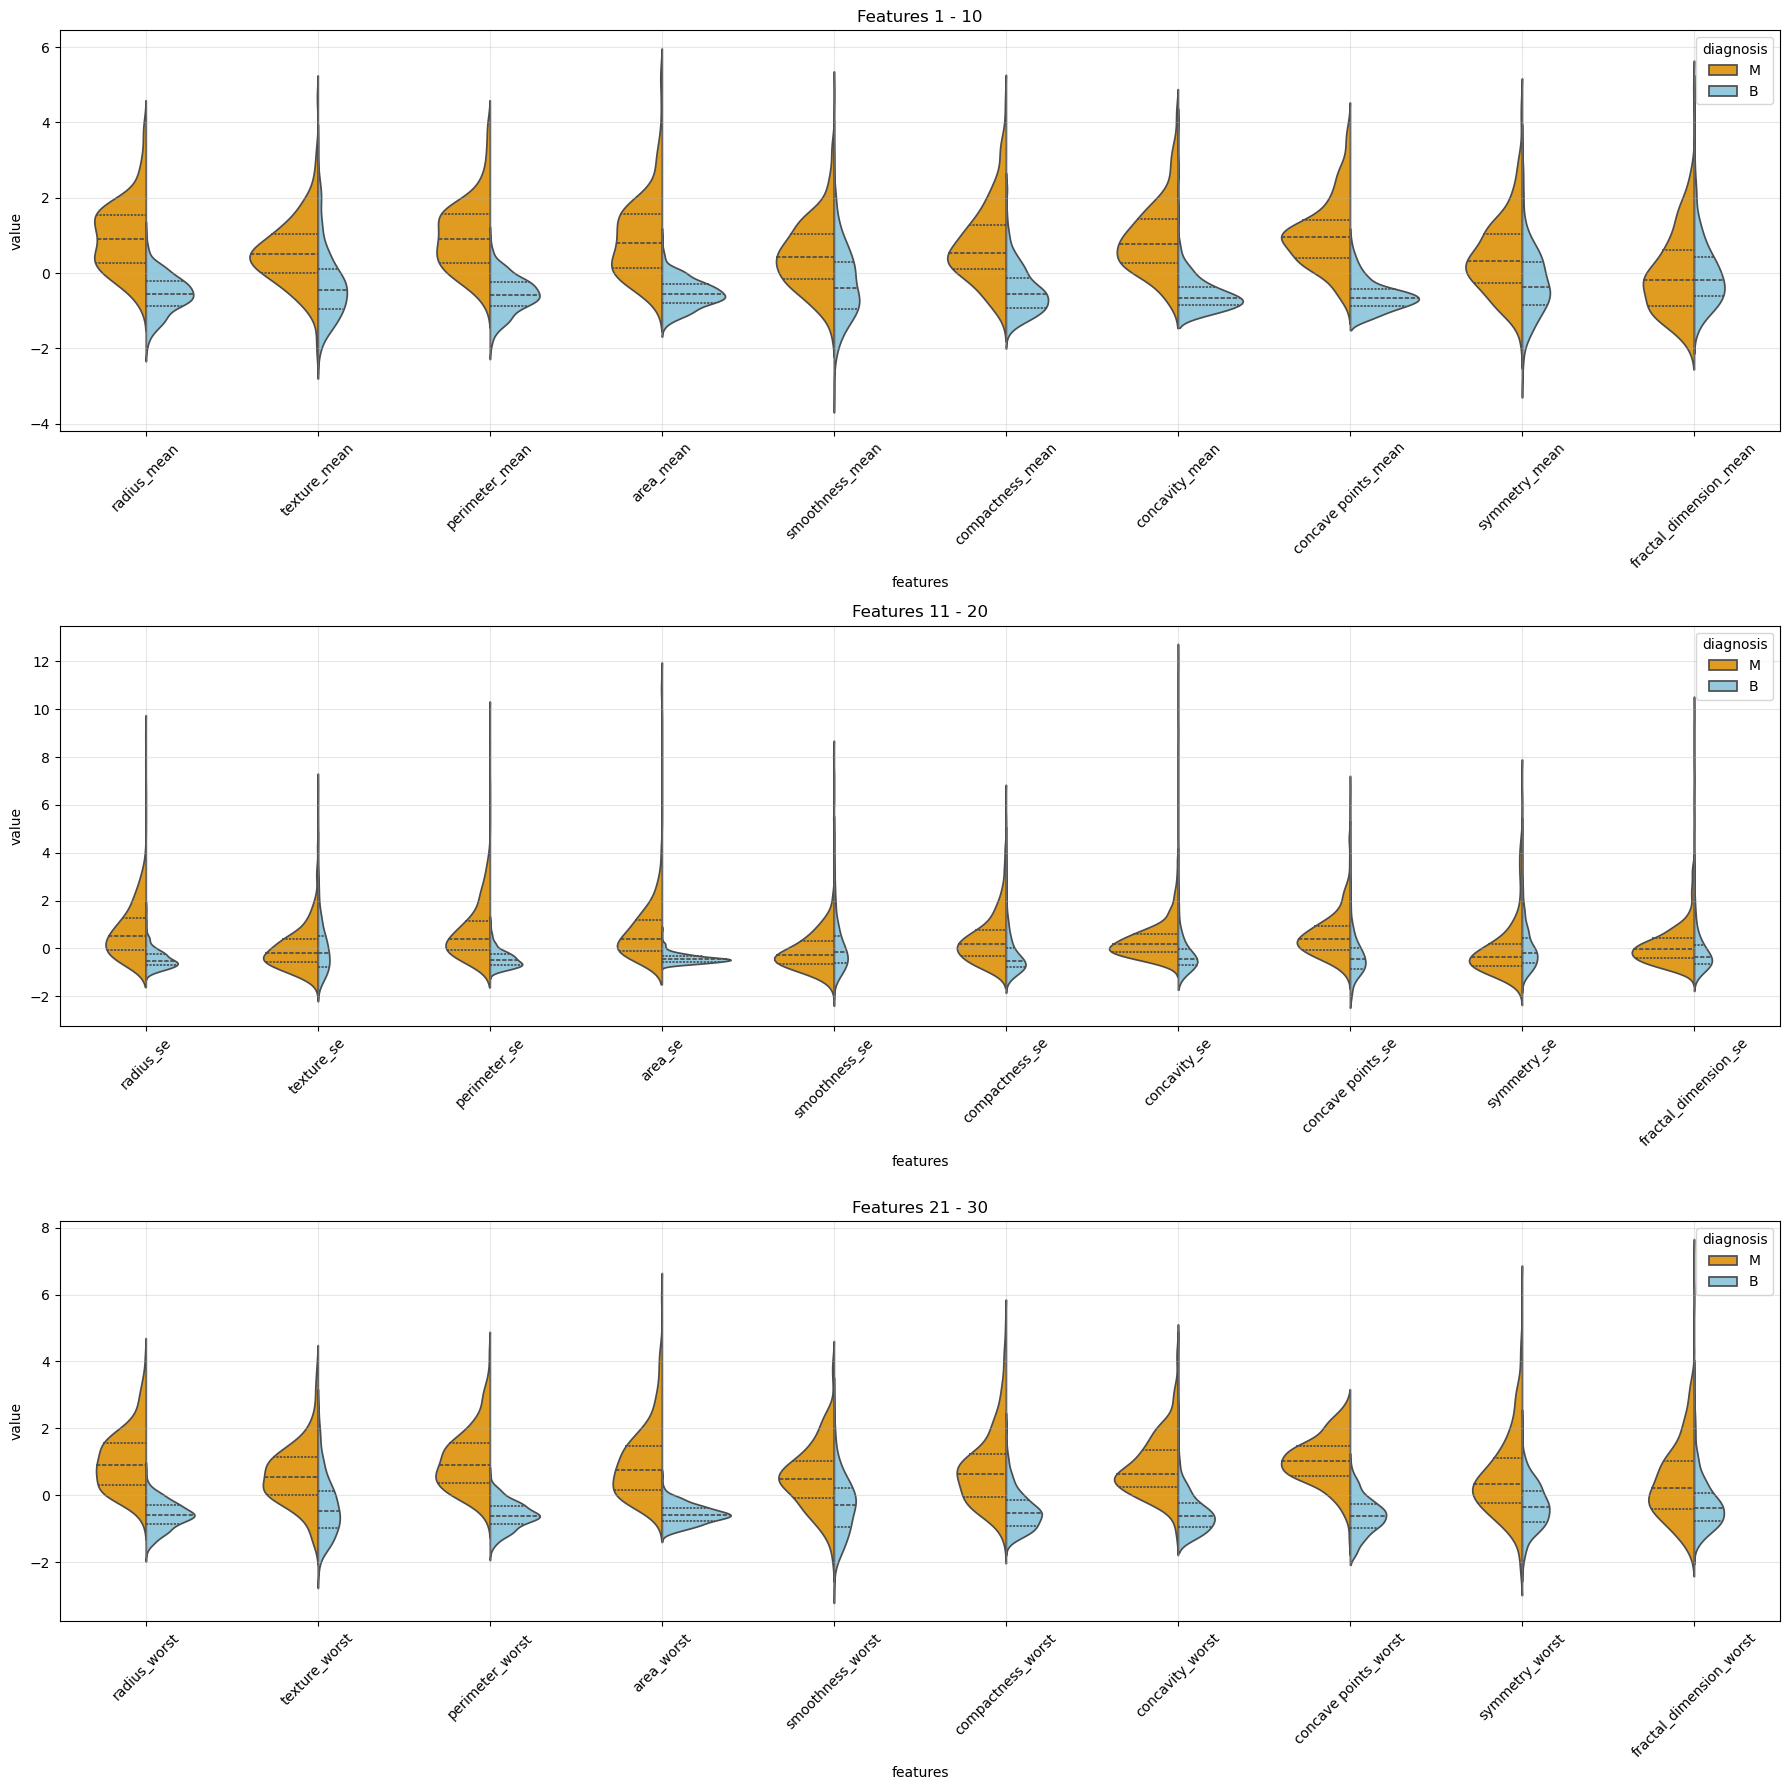

In [10]:
# 1. Standardization
# (x - mean) / std
data_n_2 = (x - x.mean()) / (x.std())

# 2. Combine with Diagnosis
# Ensure y has the name 'diagnosis' so melt works
y.name = 'diagnosis'
data_viz = pd.concat([y, data_n_2], axis=1)

# 3. Plot in Loop (3 rows of 10 features)
features = x.columns
chunk_size = 10
n_chunks = int(np.ceil(len(features) / chunk_size))

fig, axes = plt.subplots(n_chunks, 1, figsize=(18, 6 * n_chunks))

for i in range(n_chunks):
    start = i * chunk_size
    end = (i + 1) * chunk_size
    subset = features[start:end]
    
    # Melt only the specific subset of features for this row
    data_melted = pd.melt(data_viz, id_vars="diagnosis", 
                          value_vars=subset,
                          var_name="features", value_name='value')
    
    # Plot
    sns.violinplot(x="features", y="value", hue="diagnosis", 
                   data=data_melted, split=True, inner="quart", 
                   palette={'B': 'skyblue', 'M': 'orange'}, ax=axes[i])
    
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Features {start+1} - {min(end, len(features))}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

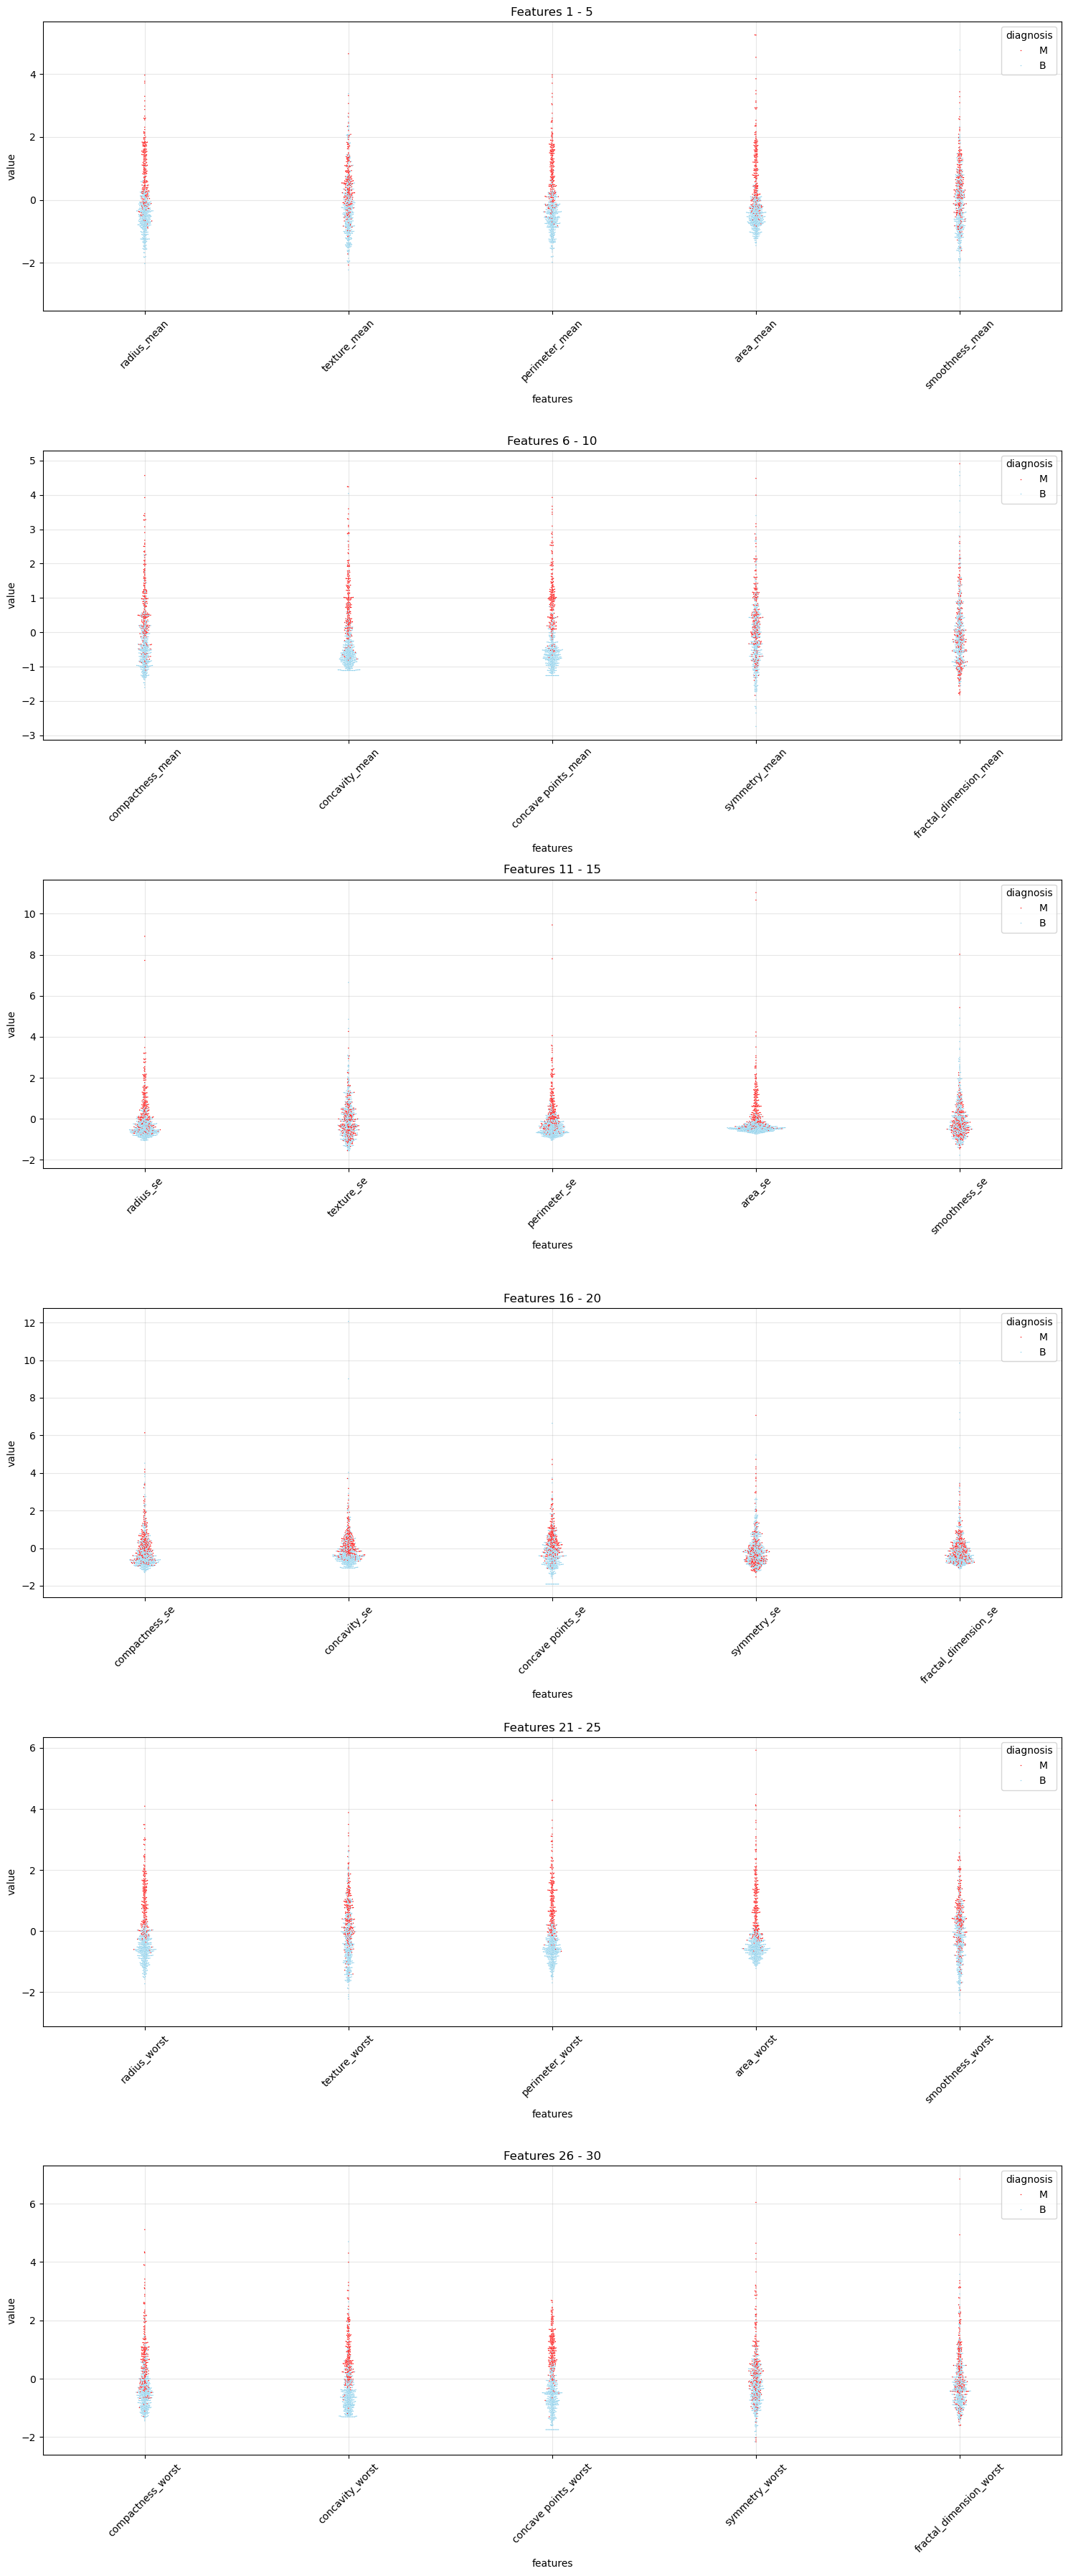

Plotting took: 29.7 seconds


In [12]:
# 1. Standardization
# (x - mean) / std
data_n_2 = (x - x.mean()) / (x.std())

# 2. Combine with Diagnosis
# Ensure y has the name 'diagnosis' so melt works
y.name = 'diagnosis'
data_viz = pd.concat([y, data_n_2], axis=1)

# 3. Plotting Setup
features = x.columns
chunk_size = 5
n_chunks = int(np.ceil(len(features) / chunk_size))

# Create a figure with 3 rows (subplots)
plt.figure(figsize=(15, 6 * n_chunks))

tic = time.time() # Start timer

for i in range(n_chunks):
    plt.subplot(n_chunks, 1, i+1)
    
    start = i * chunk_size
    end = (i + 1) * chunk_size
    subset = features[start:end]
    
    # Melt only the specific subset of features for this row
    data_melted = pd.melt(data_viz, id_vars="diagnosis", 
                          value_vars=subset,
                          var_name="features", value_name='value')
    
    # Plot Swarm
    # Note: size=3 helps prevent points from overlapping too much
    sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_melted, 
                  palette={'B': 'skyblue', 'M': 'red'}, size=1)
    
    plt.xticks(rotation=45)
    plt.title(f'Features {start+1} - {min(end, len(features))}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

toc = time.time()
print(f"Plotting took: {toc - tic:.1f} seconds")

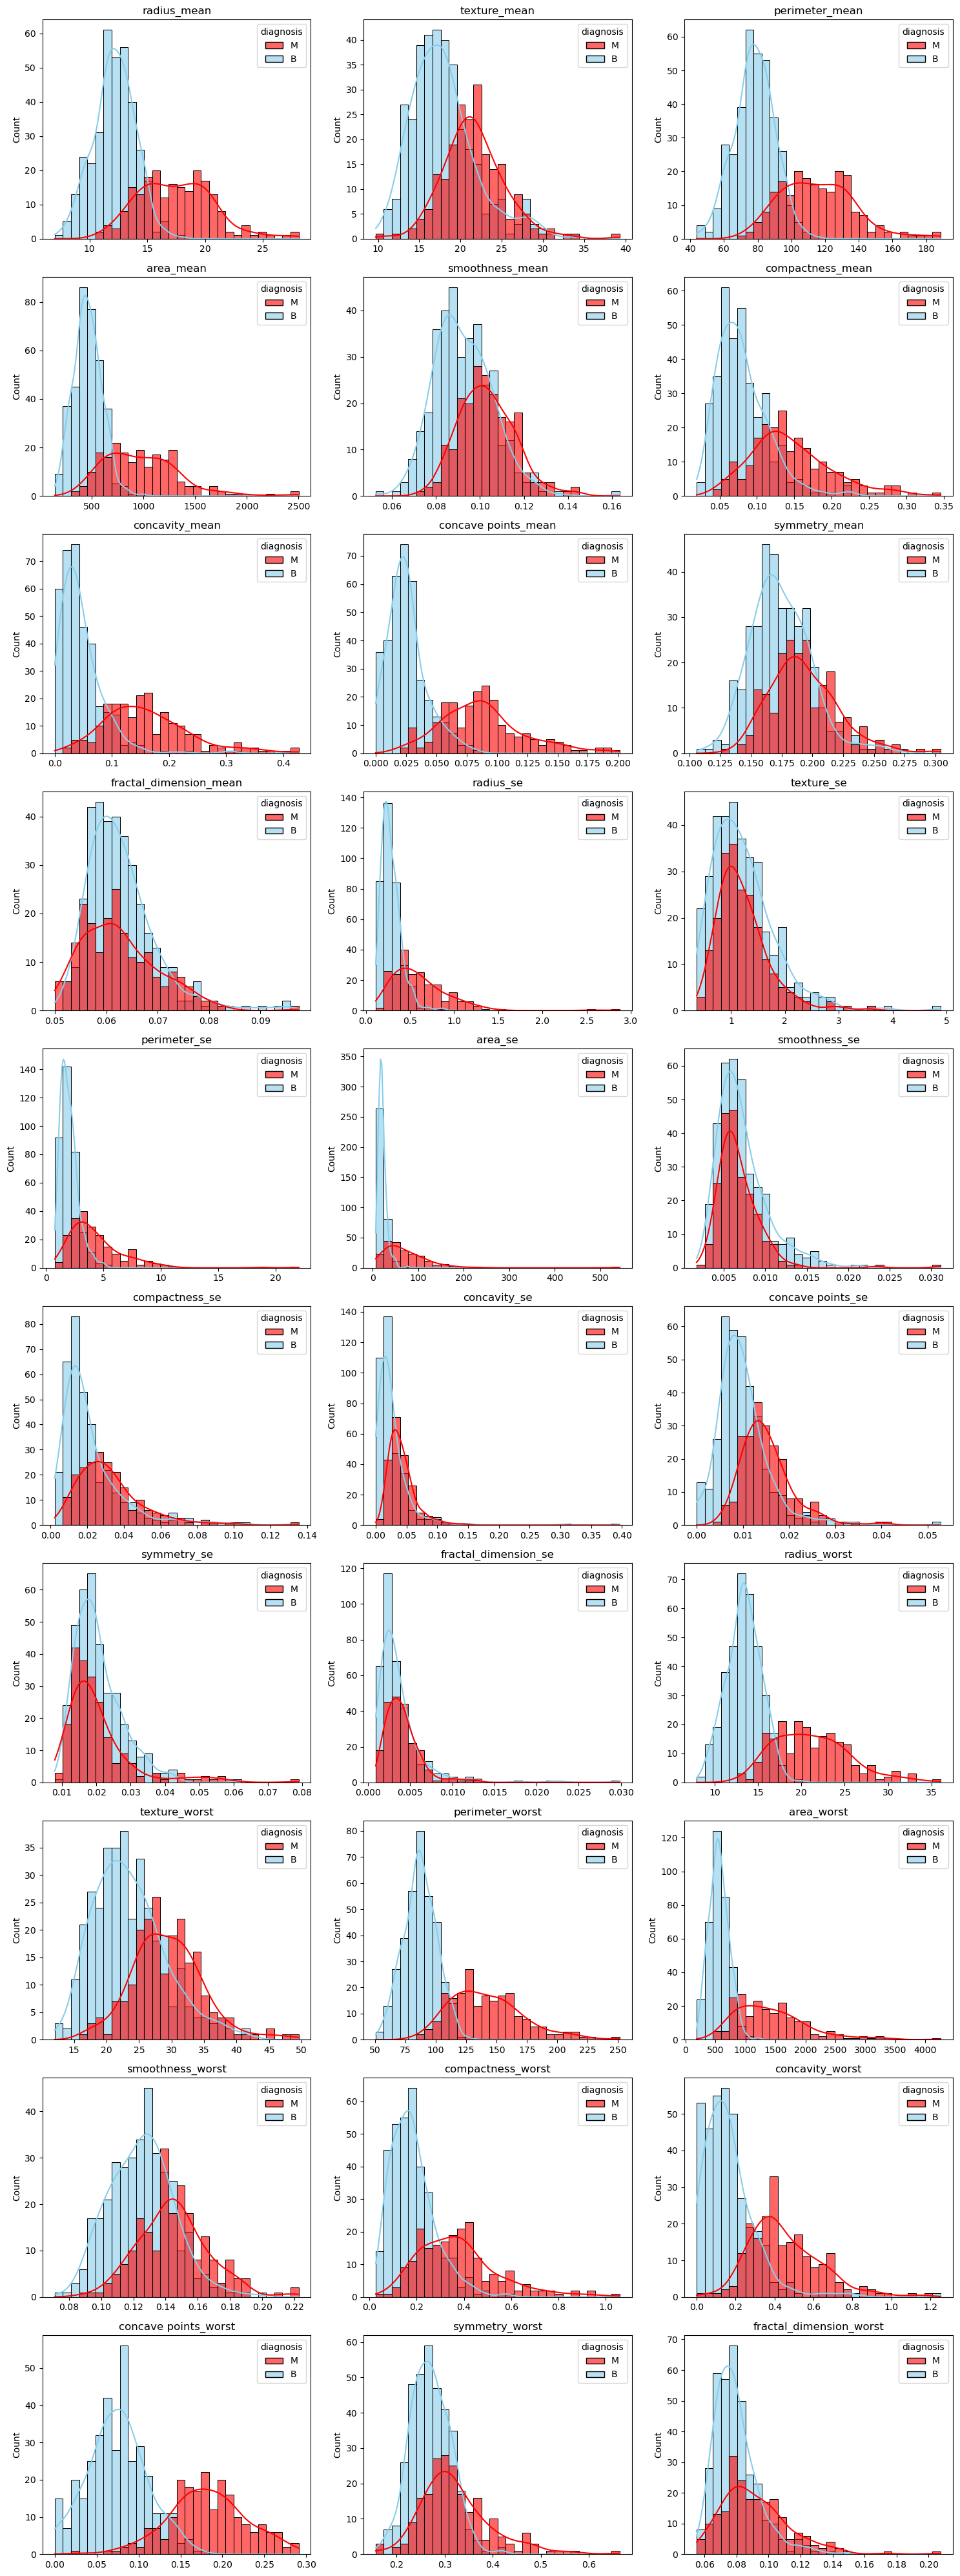

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select all numerical columns (excluding the target 'diagnosis' or 'id')
# Assuming 'x' is your dataframe containing just the 30 features
features = x.columns 

# Setup grid: 10 rows x 3 columns
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

plt.figure(figsize=(15, 4 * n_rows)) # Adjust height dynamically

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Plot histogram with KDE
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, bins=30, 
                 palette={'B': 'skyblue', 'M': 'red'}, alpha=0.6, common_norm=False)
    
    plt.title(f'{col}')
    plt.xlabel('') # Remove x-label to save space
    
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

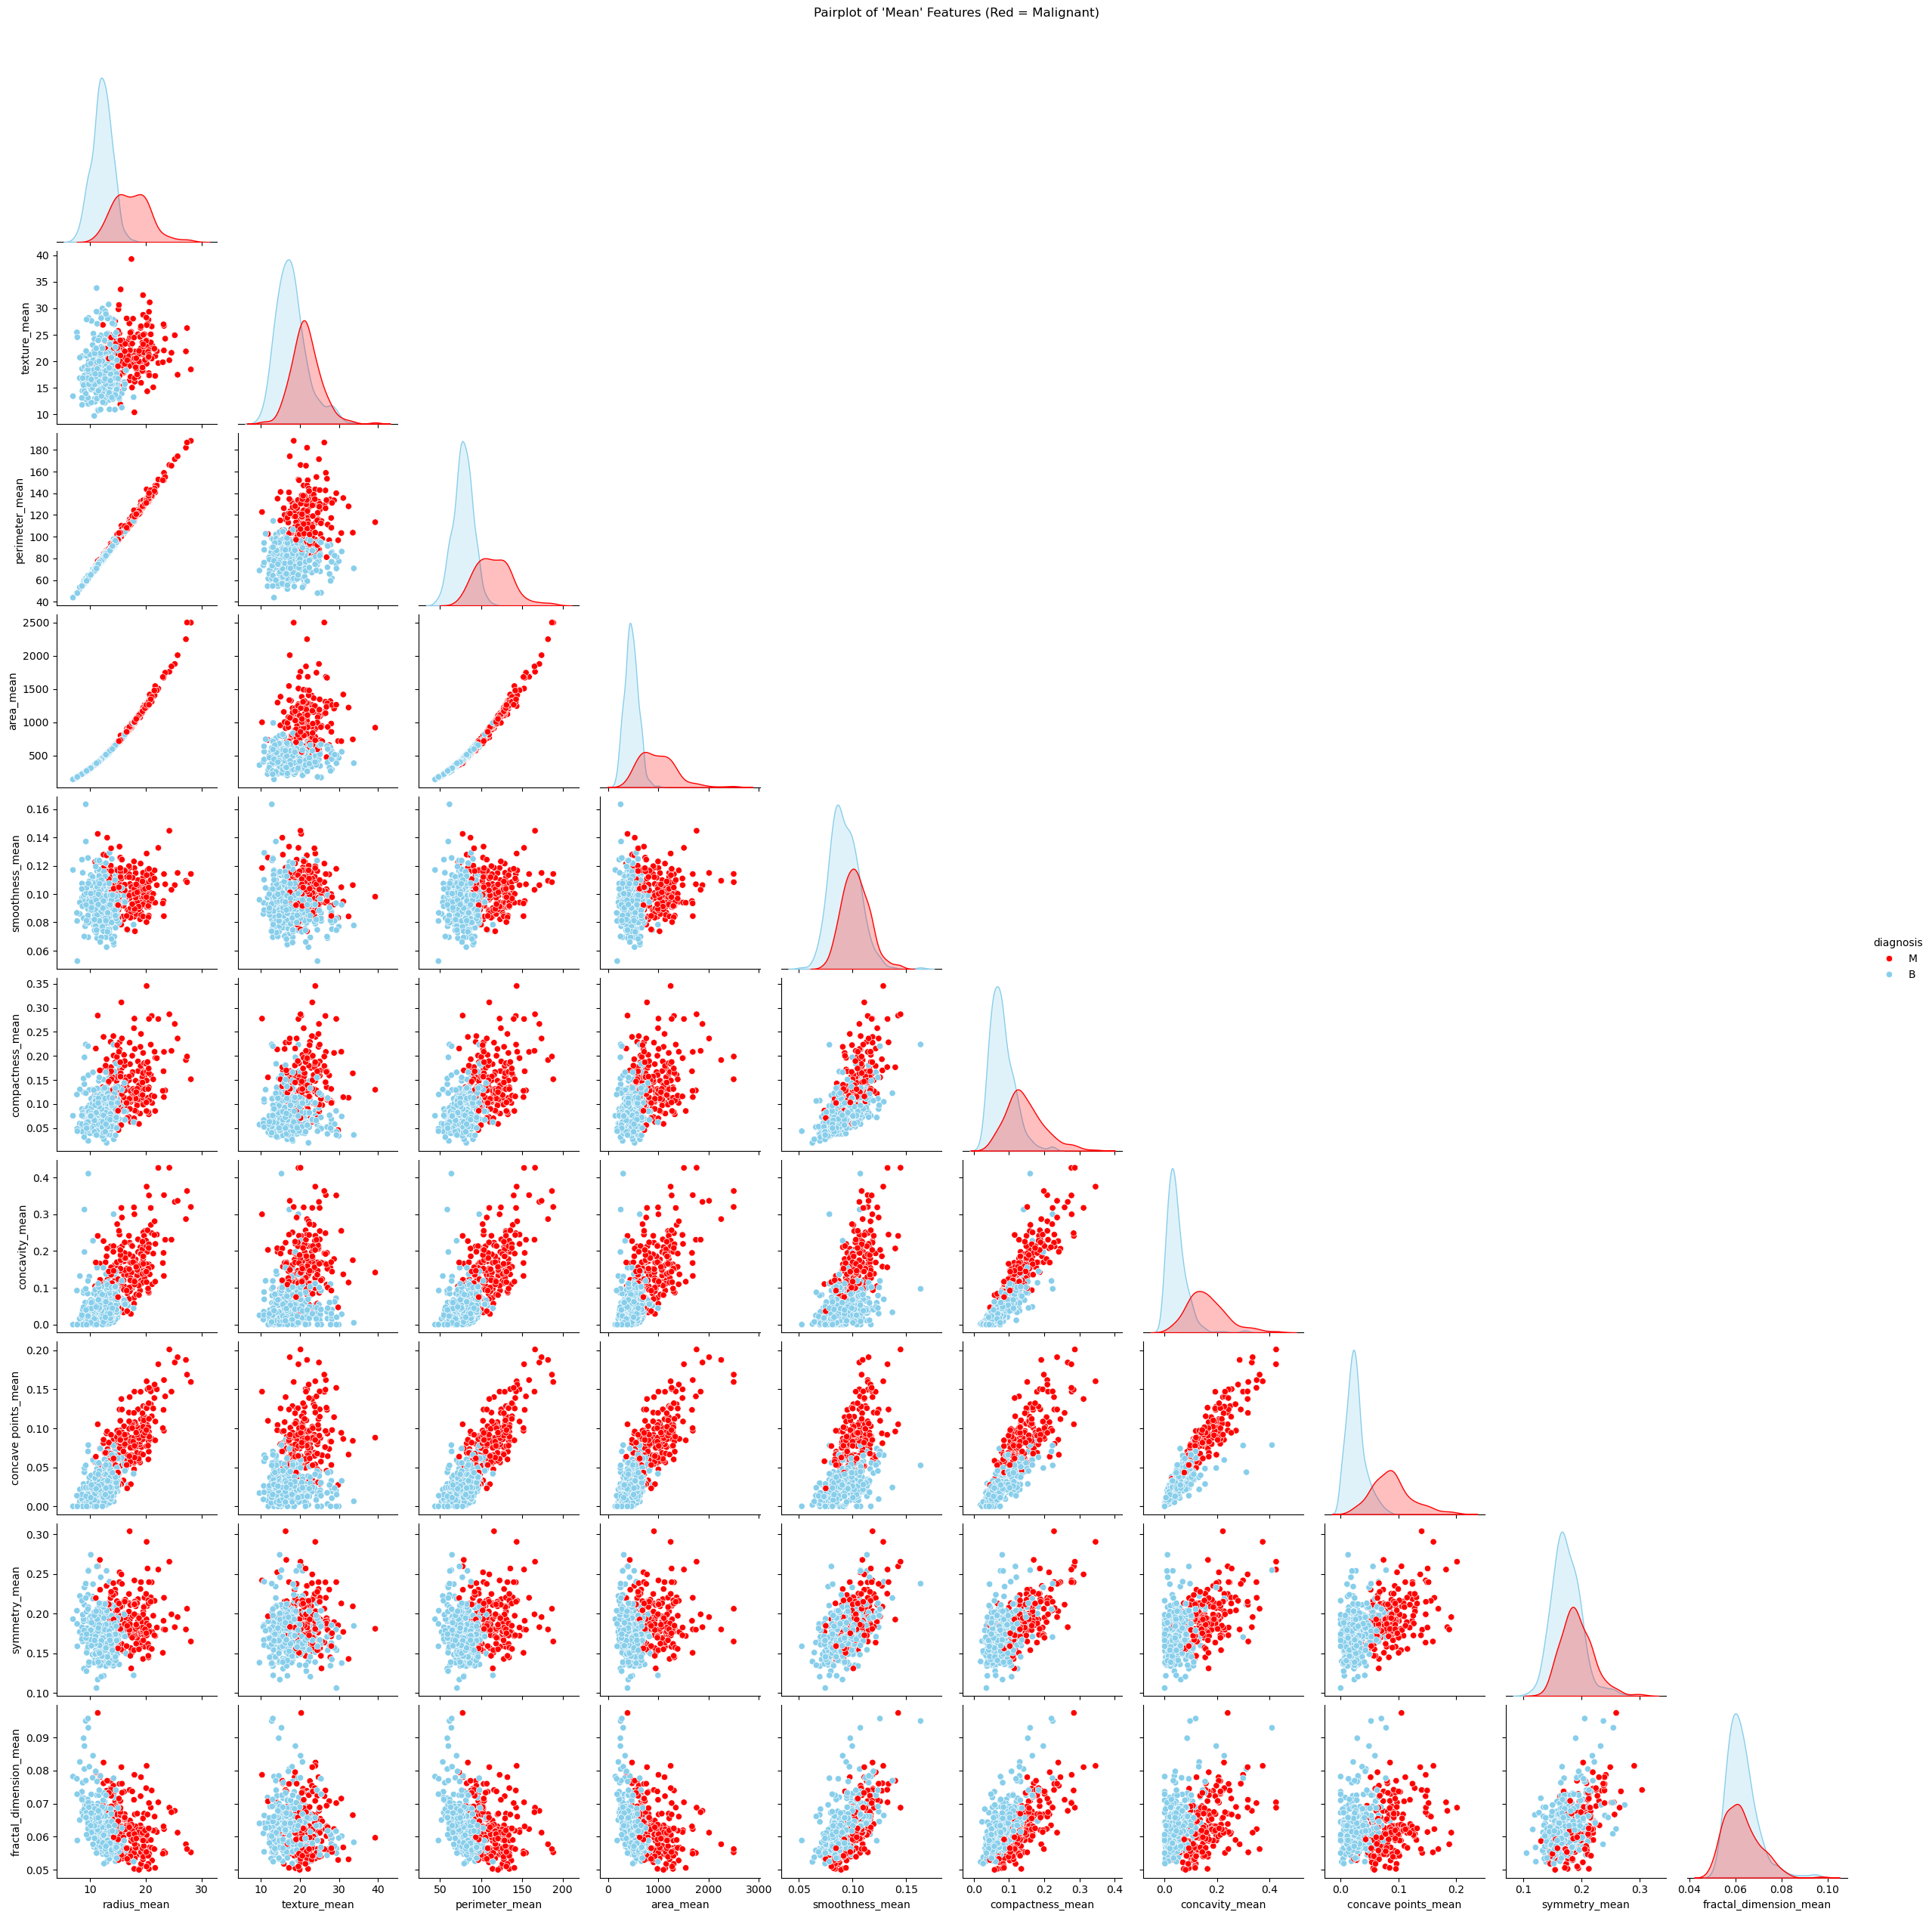

In [14]:
# Select only the "mean" columns + diagnosis for plotting
mean_cols = [col for col in df.columns if 'mean' in col]

# Add diagnosis back for coloring
plot_data = df[mean_cols + ['diagnosis']]

# Plot
plt.figure(figsize=(20, 20))
sns.pairplot(plot_data, hue='diagnosis', palette={'M':'red', 'B':'skyblue'}, corner=True)
plt.suptitle("Pairplot of 'Mean' Features (Red = Malignant)", y=1.02)
plt.show()

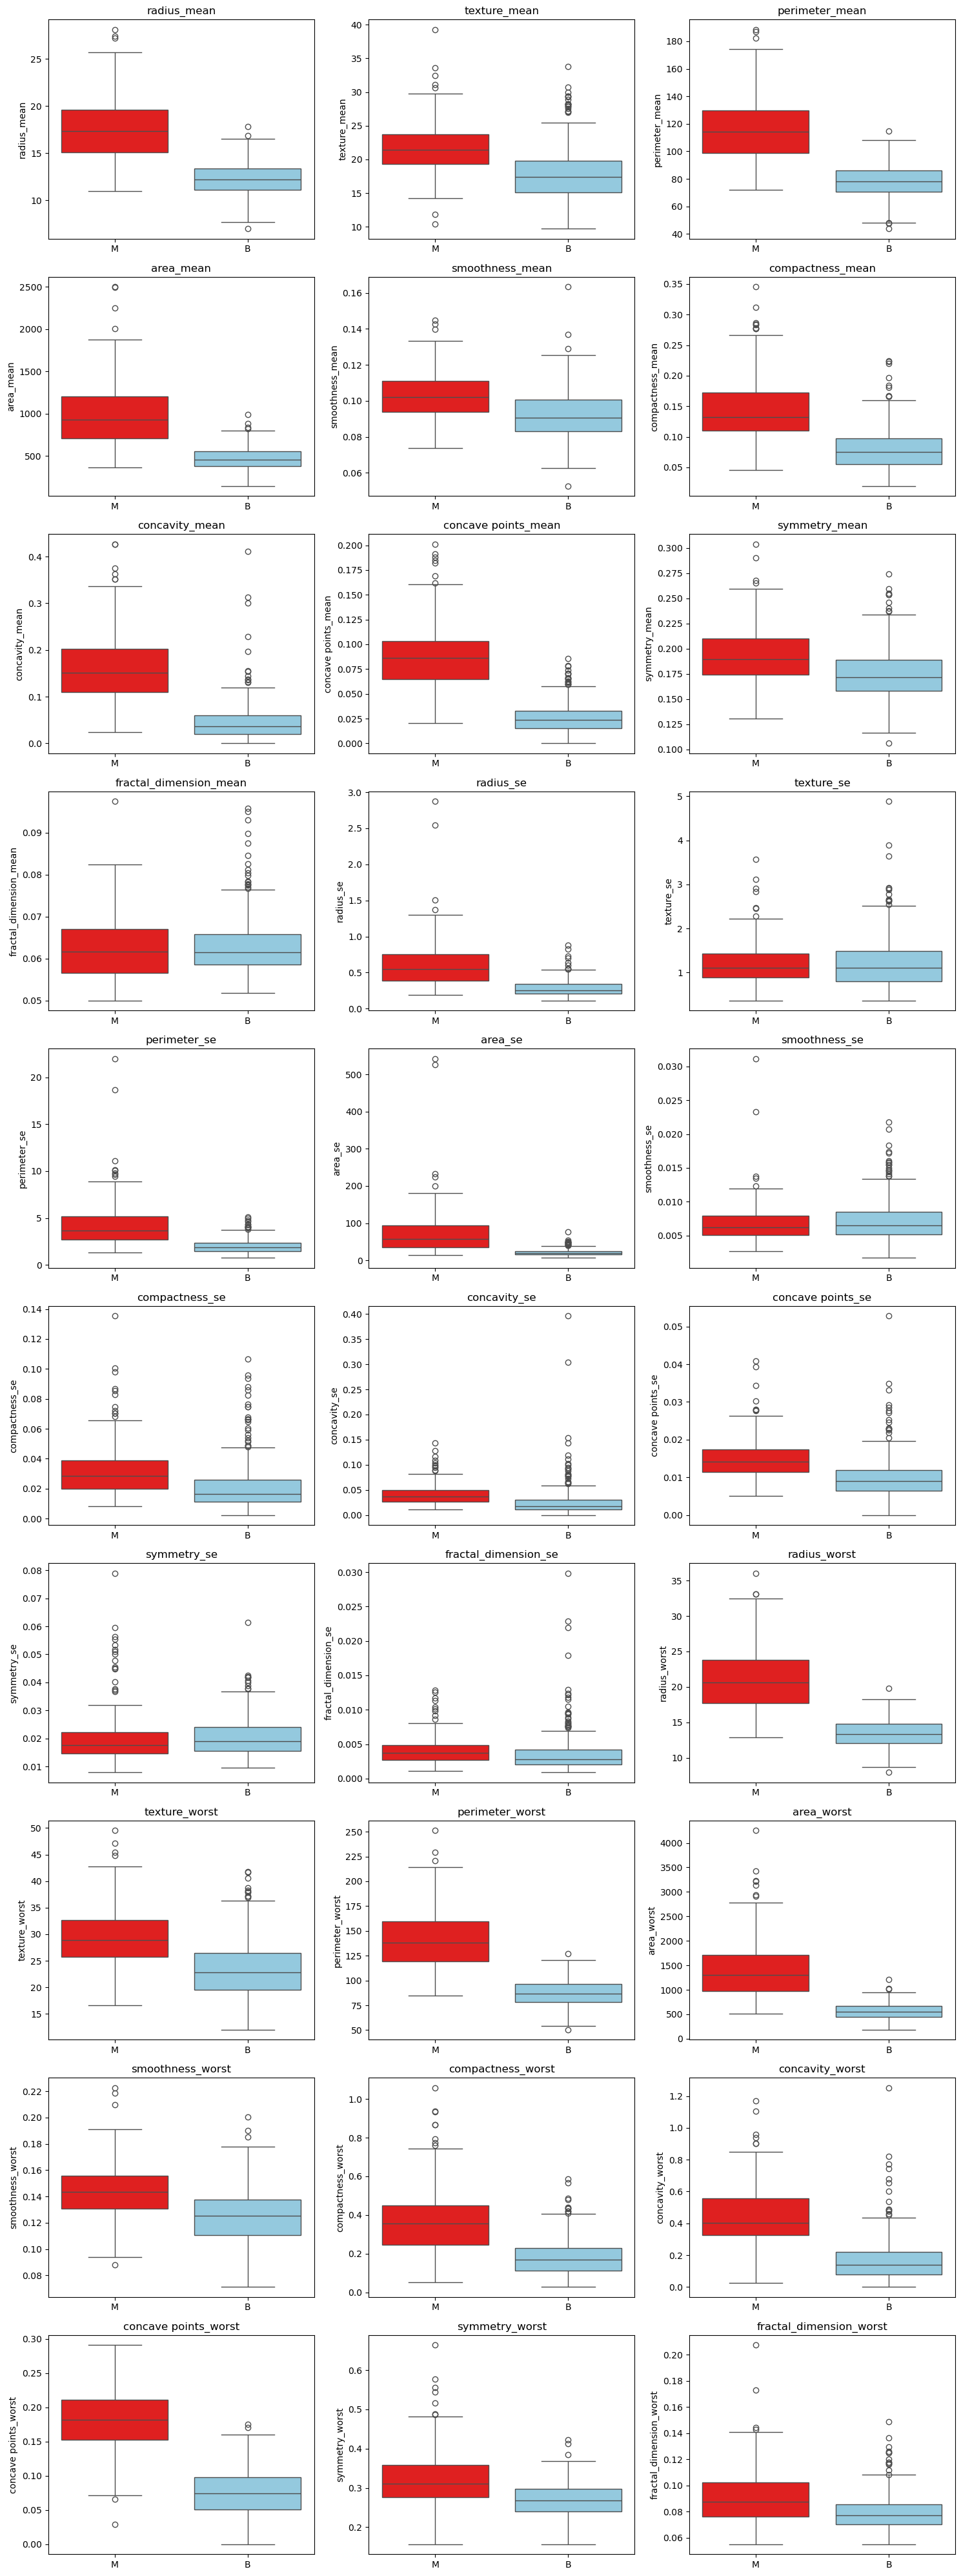

In [15]:
plt.figure(figsize=(15, 4 * n_rows)) # Same grid size

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Plot Boxplot
    sns.boxplot(x='diagnosis', y=col, data=df, 
                palette={'B': 'skyblue', 'M': 'red'}, hue='diagnosis')
    
    plt.title(f'{col}')
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

### Correlation Heatmap

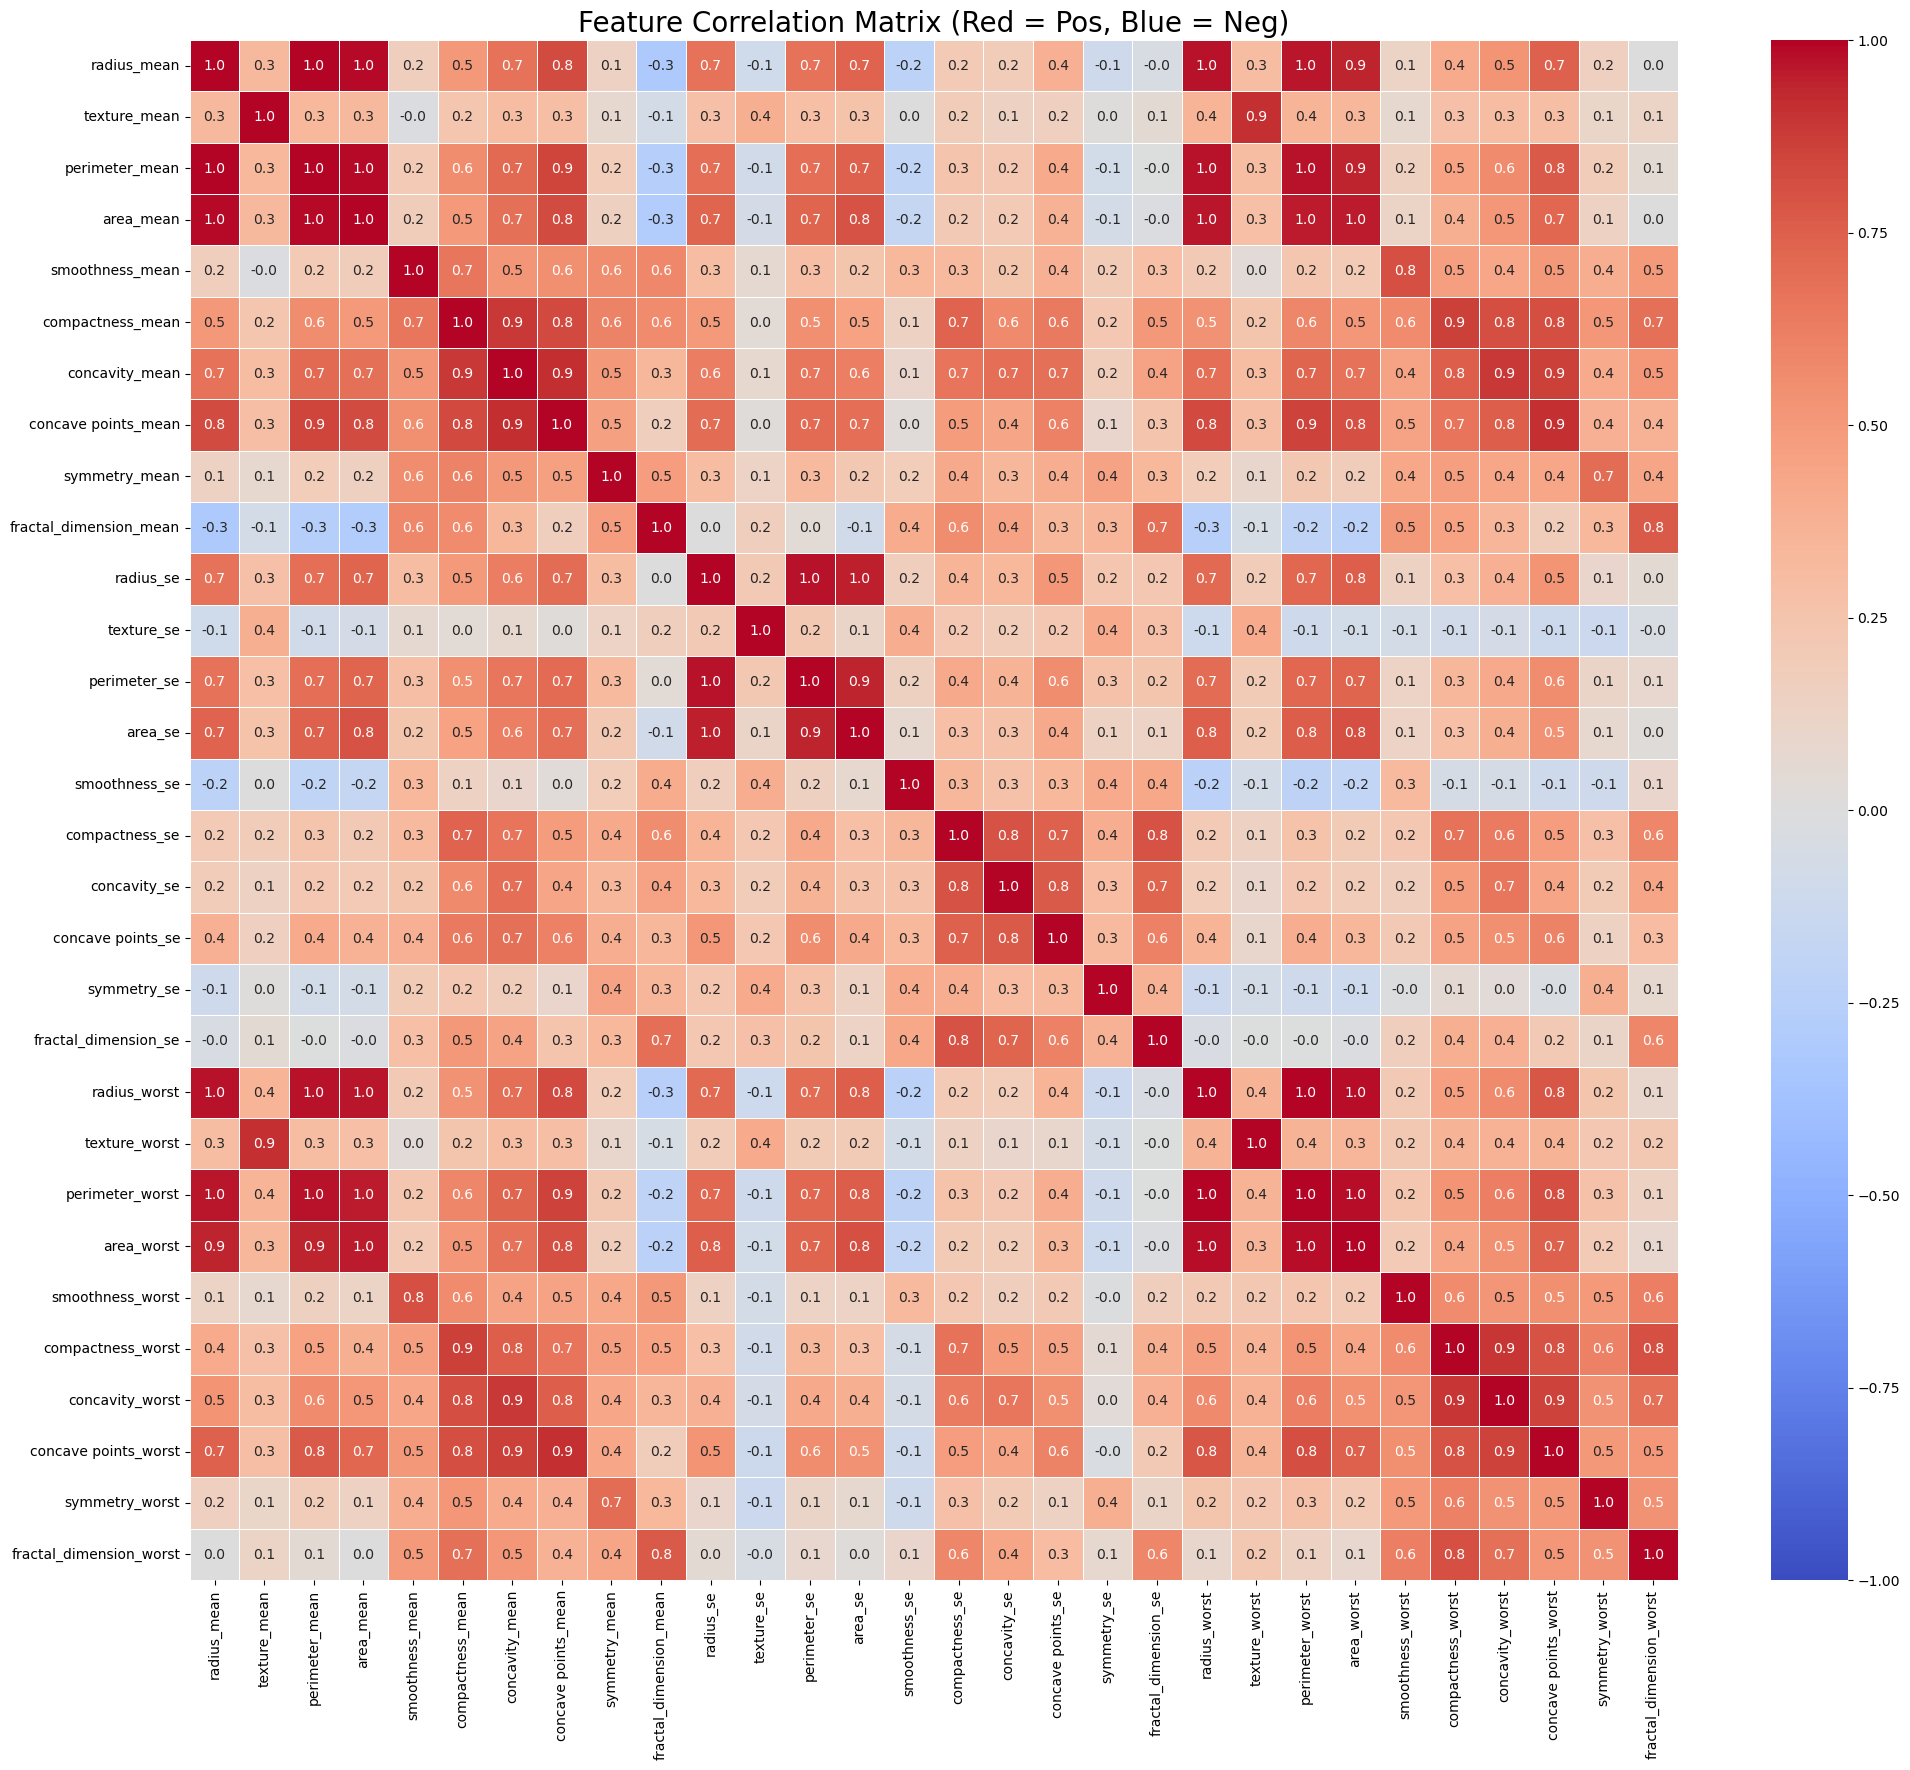

In [16]:
# Increase figure size for better readability of 30x30 matrix
f, ax = plt.subplots(figsize=(24, 20)) 

# Change cmap to 'coolwarm' (Red-Blue)
# vmin=-1, vmax=1 centered=0 ensures 0 correlation is exactly white/neutral
sns.heatmap(x.corr(), 
            annot=True, 
            linewidths=.5, 
            fmt='.1f', 
            cmap='coolwarm',
            vmin=-1, vmax=1, center=0, 
            ax=ax
           )

plt.title('Feature Correlation Matrix (Red = Pos, Blue = Neg)', size=20)
plt.show()

## Feature Selection

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict.

### Feature selection with correlation and random forest classification
As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [17]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1, axis=1)        # do not modify x, we will use it later 
x_1.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

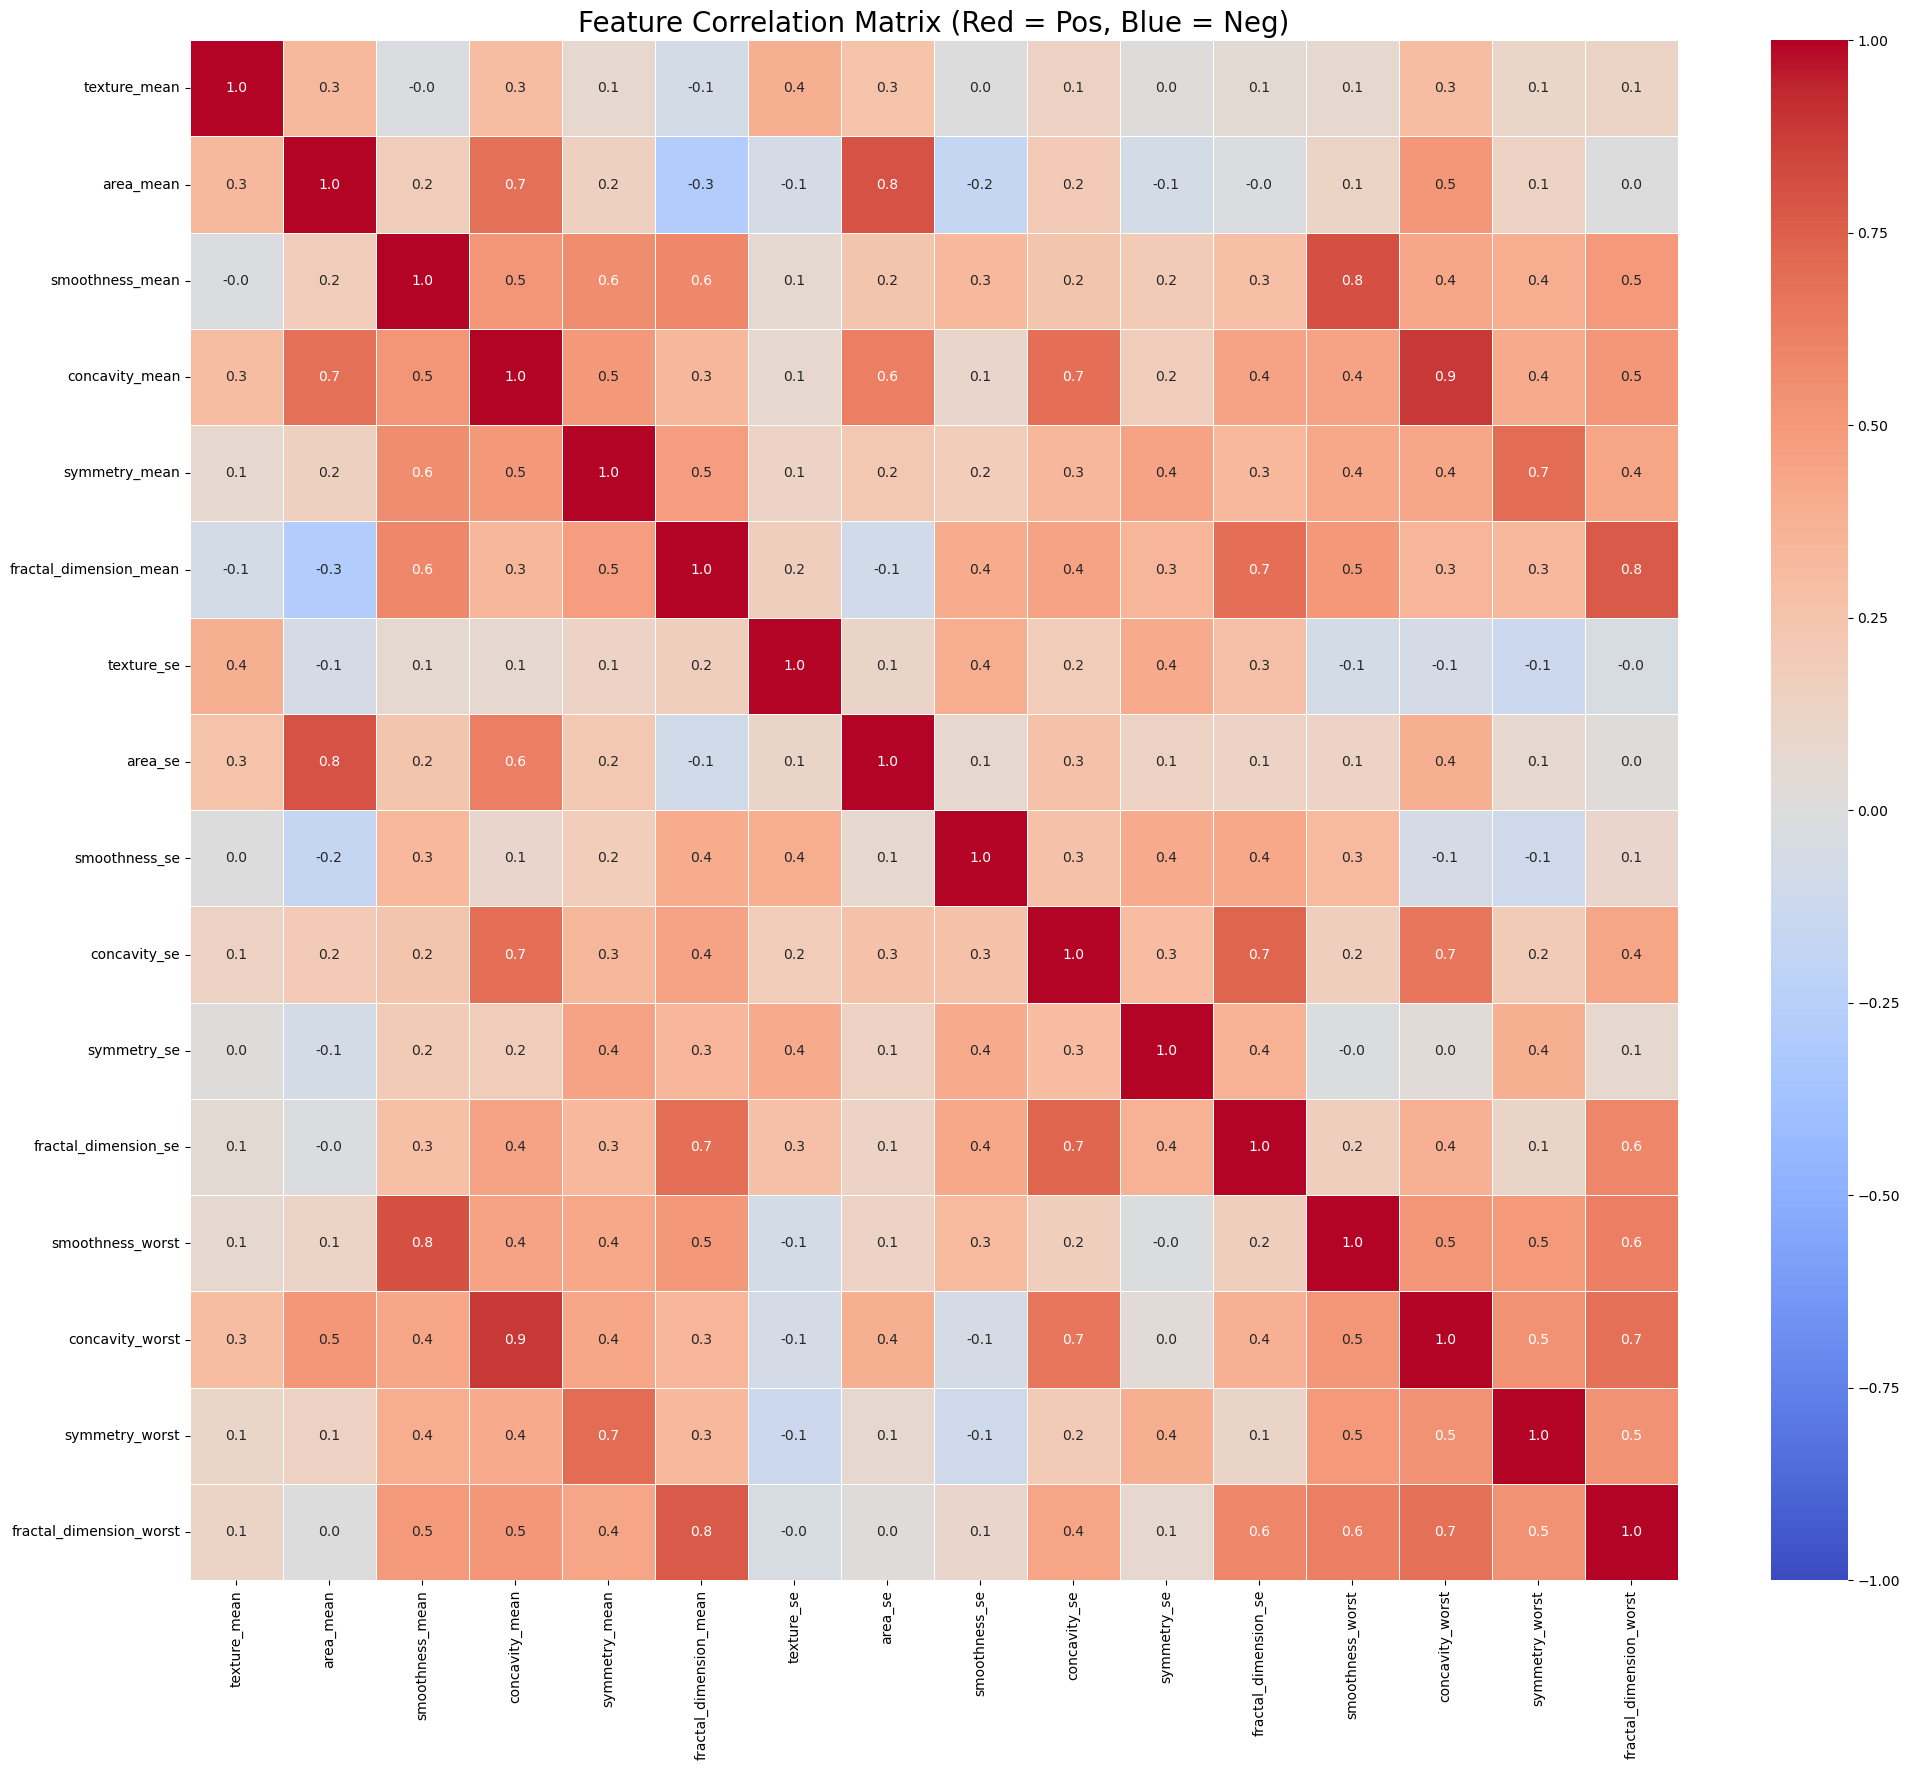

In [18]:
# Increase figure size for better readability of 30x30 matrix
f, ax = plt.subplots(figsize=(24, 20)) 

# Change cmap to 'coolwarm' (Red-Blue)
# vmin=-1, vmax=1 centered=0 ensures 0 correlation is exactly white/neutral
sns.heatmap(x_1.corr(), 
            annot=True, 
            linewidths=.5, 
            fmt='.1f', 
            cmap='coolwarm',
            vmin=-1, vmax=1, center=0, 
            ax=ax
           )

plt.title('Feature Correlation Matrix (Red = Pos, Blue = Neg)', size=20)
plt.show()

After drop correlated features, as it can be seen, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

Accuracy is:  0.9707602339181286


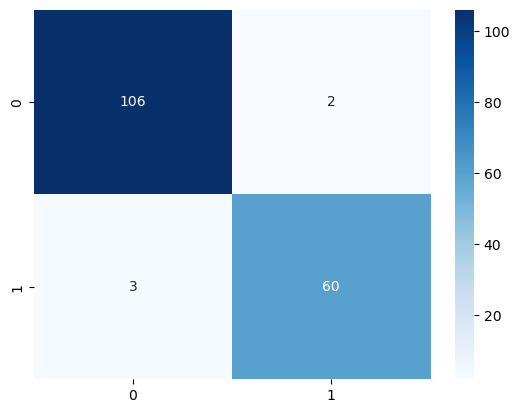

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(x_test))
sns.heatmap(cm, cmap = 'Blues', annot=True, fmt="d")
plt.show()

Accuracy is 97% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.

### Univariate feature selection and random forest classification

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [38]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean. So lets se what happens if we use only these best scored 5 feature.

Accuracy is:  0.9532163742690059


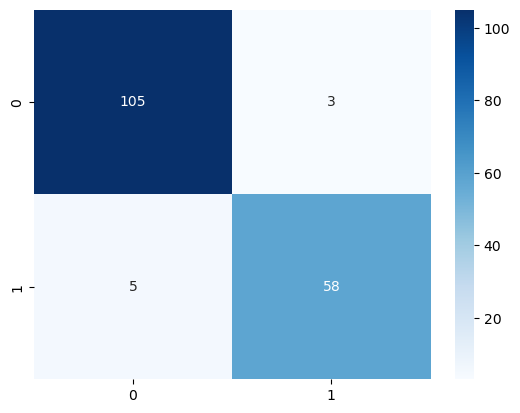

In [41]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=42)      
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train)
ac_2 = accuracy_score(y_test, clf_rf_2.predict(x_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2, cmap='Blues', annot=True, fmt="d")
plt.show()

Accuracy is lower than before and predictions are worse, as seen in the confusion matrix. Let's try with k=10.

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
Accuracy is:  0.9649122807017544


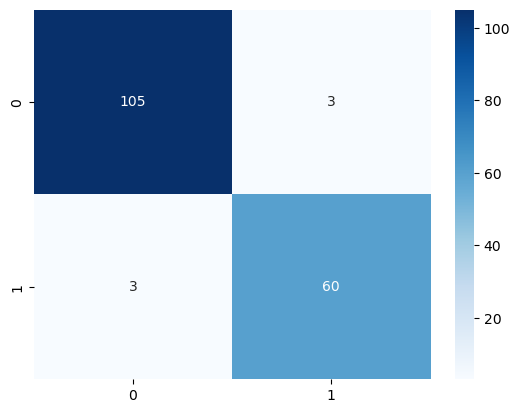

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=42)      
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train)
ac_2 = accuracy_score(y_test, clf_rf_2.predict(x_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2, cmap='Blues', annot=True, fmt="d")
plt.show()

What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 10 features in selectkBest method accuracy looks worse than taking all features. Now lets see other feature selection methods to find better results.

### Recurisve feature elimination (RFE) with random forest
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [44]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier(random_state=42)      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [45]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


Chosen 5 best features by rfe is texture_mean, area_mean, concavity_mean, area_se, concavity_worst. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. For now, we can say that we make good feature selection with rfe and selectkBest methods. However, as you can see there is a problem, how do we know the correct k value? Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

### Recursive feature elimination with cross validation and random forest classification
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html 

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [46]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=42) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Finally, we find best 15 features that are texture_mean, area_mean, smoothness_mean, concavity_mean symmetry_mean, fractal_dimension_mean, area_se, smoothness_se, concavity_se, symmetry_se, fractal_dimension_se smoothness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst for best classification. Lets look at best accuracy with plot.

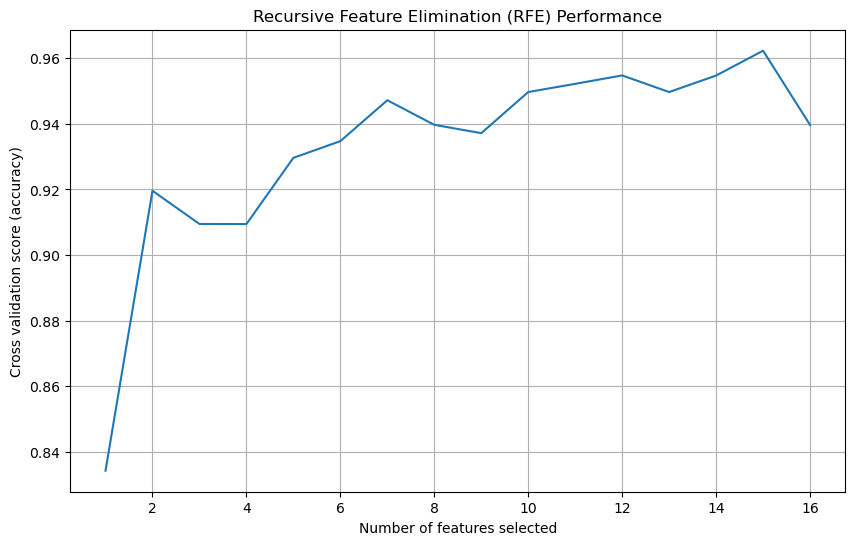

In [48]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")

scores = rfecv.cv_results_['mean_test_score']

plt.plot(range(1, len(scores) + 1), scores)
plt.title('Recursive Feature Elimination (RFE) Performance')
plt.grid(True)
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make feature selection and understanding data. Then last make our last feature selection method.

### Tree based feature selection and random forest classification¶
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

Feature ranking:
1. feature 3 (0.208031)
2. feature 1 (0.203255)
3. feature 7 (0.170181)
4. feature 13 (0.128019)
5. feature 0 (0.049296)
6. feature 14 (0.044006)
7. feature 9 (0.036853)
8. feature 12 (0.034943)
9. feature 2 (0.027117)
10. feature 11 (0.019706)
11. feature 8 (0.016327)
12. feature 5 (0.014069)
13. feature 10 (0.013586)
14. feature 15 (0.012822)
15. feature 4 (0.011723)
16. feature 6 (0.010066)


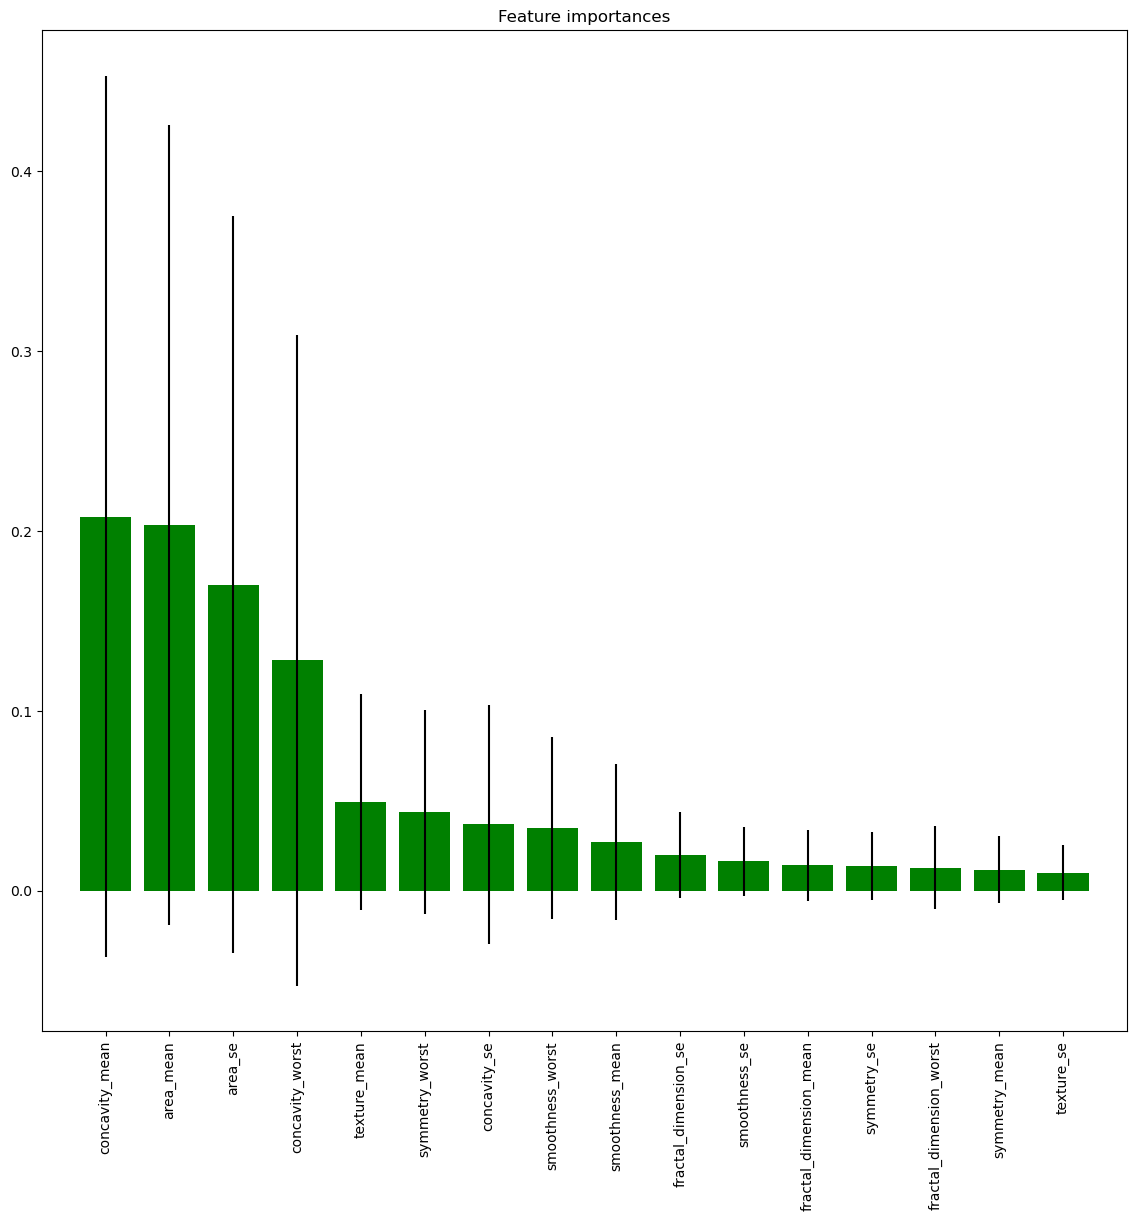

In [49]:
clf_rf_5 = RandomForestClassifier(random_state=42)      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features.